In [30]:
import matplotlib.pyplot as plt  
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd  
from wordcloud import WordCloud
import seaborn as sns
import squarify
import networkx as nx
import numpy as np
from mlxtend.preprocessing import TransactionEncoder

In [31]:
#Importing the dataset  
dataset = pd.read_csv("Market_Basket.csv",header = None)

In [32]:
print(dataset.head())
print(dataset.shape)
print(dataset.info)
print(dataset.describe())

              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  sala

/home/rajendra/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/rajendra/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/rajendra/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/rajendra/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  b

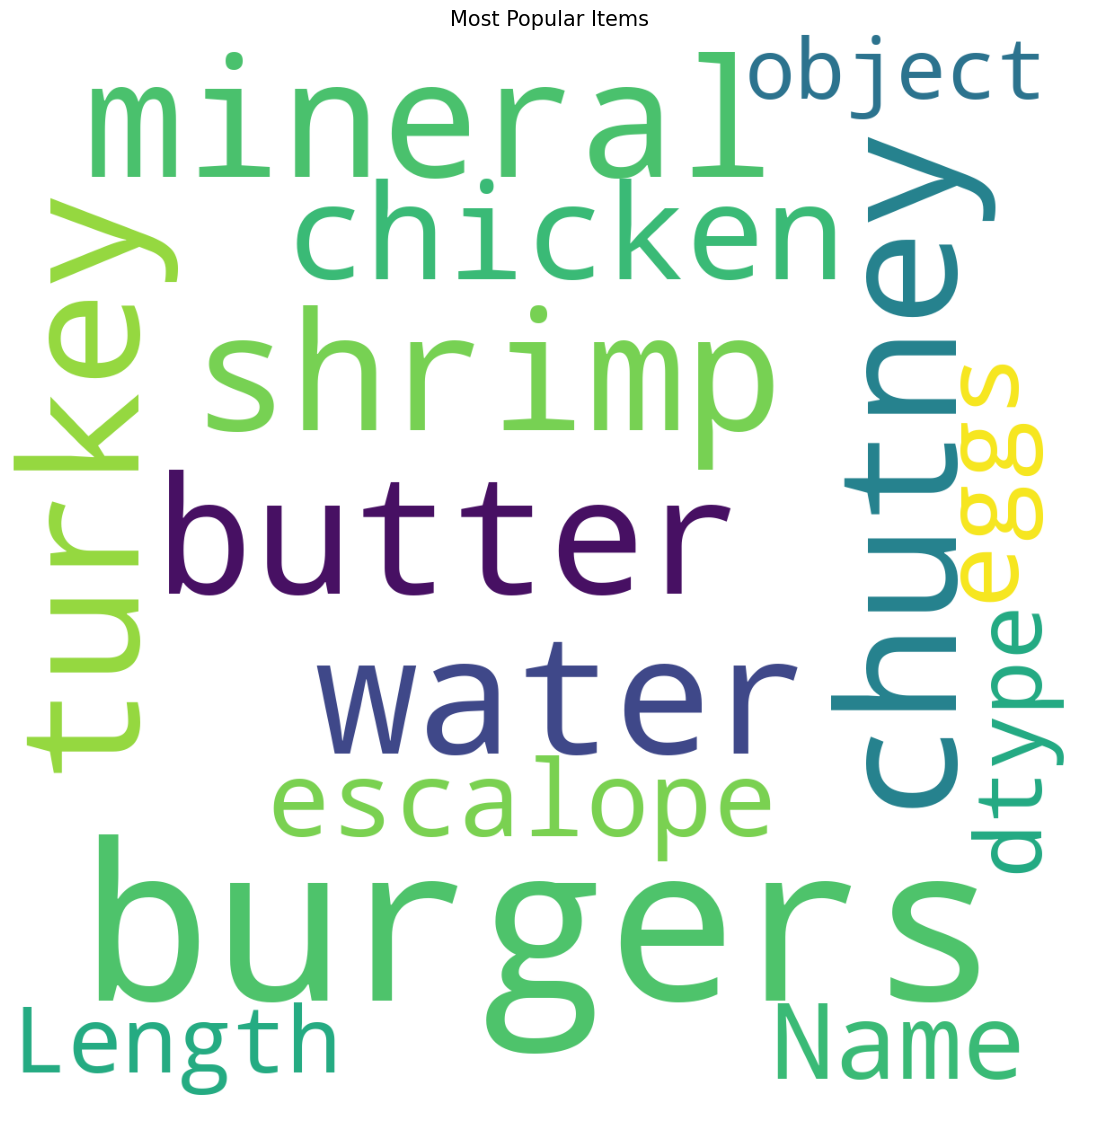

In [33]:
plt.rcParams['figure.figsize'] = (14, 14)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(dataset[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 15)
plt.show()

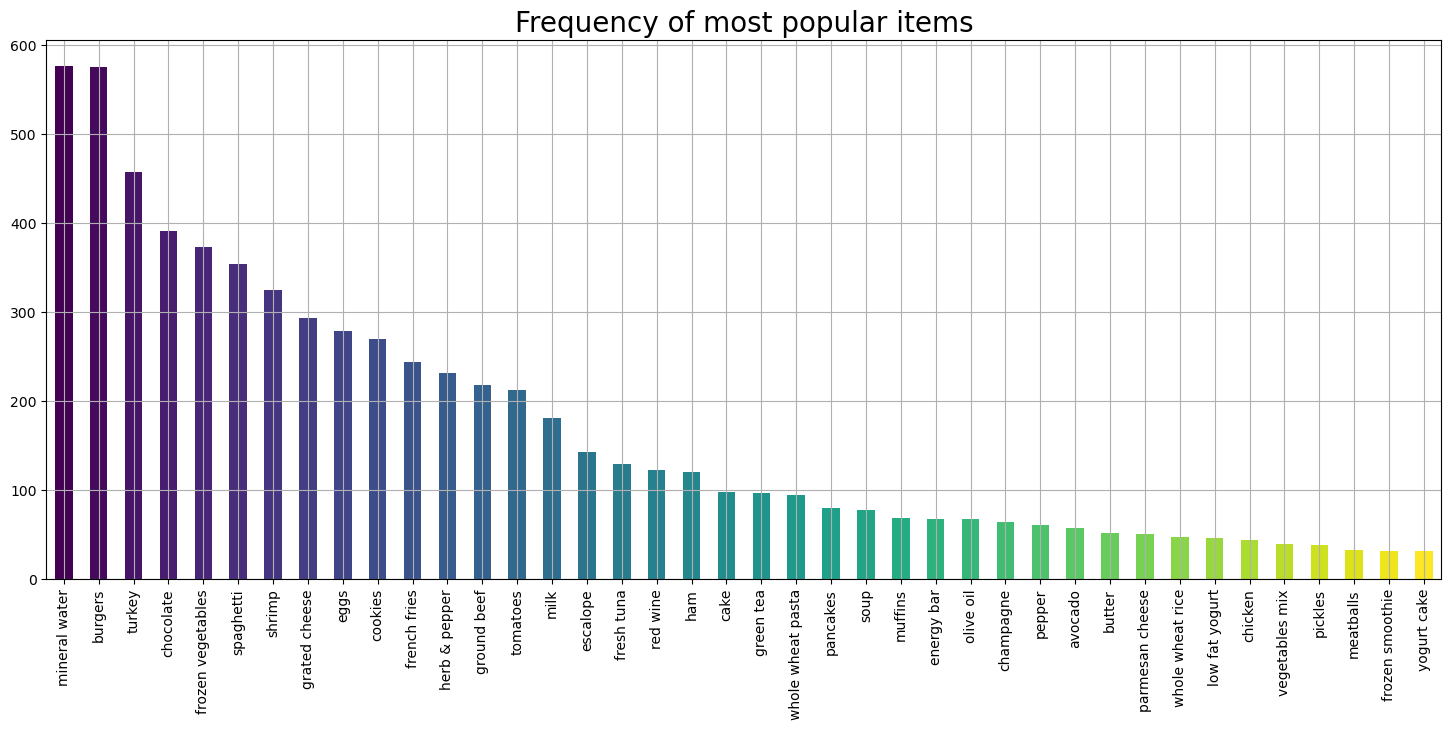

In [34]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.viridis(np.linspace(0, 1, 40))
dataset[0].value_counts().head(40).plot.bar(color = color)
plt.title('Frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show() 

In [35]:
transactions = []
for i in range(0, 7501):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

In [36]:
transac = TransactionEncoder()
dataset = transac.fit_transform(transactions)
print(dataset)
data = pd.DataFrame(dataset, columns= transac.columns_)
print(data.head())

[[False  True  True ...  True False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False  True False]]
    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False

In [37]:
frequent_itemsets = apriori(data, min_support=0.003, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))

In [38]:
print(frequent_itemsets.head())
print(frequent_itemsets[frequent_itemsets['length'] >= 3].head(10))

    support             itemsets  length
0  0.020397            (almonds)       1
1  0.008932  (antioxydant juice)       1
2  0.004666          (asparagus)       1
3  0.033329            (avocado)       1
4  0.004533        (babies food)       1
       support                           itemsets  length
1017  0.005199            (almonds, nan, burgers)       3
1018  0.003066               (almonds, cake, nan)       3
1019  0.005999          (almonds, chocolate, nan)       3
1020  0.006532               (almonds, eggs, nan)       3
1021  0.004399       (almonds, french fries, nan)       3
1022  0.003066  (almonds, frozen vegetables, nan)       3
1023  0.004933          (almonds, green tea, nan)       3
1024  0.003866        (almonds, ground beef, nan)       3
1025  0.005199               (almonds, milk, nan)       3
1026  0.007466      (almonds, mineral water, nan)       3


In [39]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
print(rules.head(20))


            antecedents          consequents  antecedent support  \
0             (almonds)            (burgers)            0.020397   
1             (burgers)            (almonds)            0.087188   
2             (almonds)               (cake)            0.020397   
3                (cake)            (almonds)            0.081056   
4             (almonds)          (chocolate)            0.020397   
5           (chocolate)            (almonds)            0.163845   
6             (almonds)               (eggs)            0.020397   
7                (eggs)            (almonds)            0.179709   
8             (almonds)       (french fries)            0.020397   
9        (french fries)            (almonds)            0.170911   
10            (almonds)  (frozen vegetables)            0.020397   
11  (frozen vegetables)            (almonds)            0.095321   
12            (almonds)          (green tea)            0.020397   
13          (green tea)            (almonds)    

In [40]:
print(rules.shape)


(17372, 9)


In [41]:
print(rules[(rules['lift'] >= 6) & (rules['confidence'] >= 0.4)])

                                   antecedents       consequents  \
8192        (mineral water, whole wheat pasta)       (olive oil)   
15899  (nan, mineral water, whole wheat pasta)       (olive oil)   
15905       (mineral water, whole wheat pasta)  (nan, olive oil)   

       antecedent support  consequent support   support  confidence      lift  \
8192             0.009599            0.065858  0.003866    0.402778  6.115863   
15899            0.009599            0.065858  0.003866    0.402778  6.115863   
15905            0.009599            0.065725  0.003866    0.402778  6.128268   

       leverage  conviction  
8192   0.003234    1.564145  
15899  0.003234    1.564145  
15905  0.003235    1.564368  


In [42]:
##Apriori implementation

In [43]:
#Importing the dataset
dataset = pd.read_csv("Market_Basket.csv",header = None)
transactions=[]
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0,20)])

In [44]:
from apyori import apriori

In [45]:
rules= apriori(transactions= transactions, min_support=0.003, min_confidence = 0.2, min_lift=3,
min_length=2, max_length=2)

In [46]:
results= list(rules)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [47]:
for item in results:
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: light cream -> chicken
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: escalope -> mushroom cream sauce
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: escalope -> pasta
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: honey -> fromage blanc
Support: 0.003332888948140248
Confidence: 0.2450980392156863
Lift: 5.164270764485569
Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: tomato sauce -> ground beef
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: light cream -> olive oil
Support: 0.003199573390214638
Confidence: 0.20512820512820515
Lift: 3.1147098515519573
Rule: olive oil -> whole wheat pasta
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
Rule: shrimp -> pasta
Support: 0.005065991201173177
Confide